# Plotting response of the Identity Reservoir as Spectral Radius Changes

**NOTE THIS USES THE NEW `rescomp` PACKAGE DOWNLOADABLE WITH PIP**

In [2]:
import rescomp as rc
import numpy as np
from matplotlib import pyplot as plt

In [3]:
RES_PARAMS = {
              "uniform_weights": True,
              "ridge_alpha": 1e-6,
              "signal_dim": 3,
              "res_sz": 50,
              "activ_f": np.tanh,
              "spect_rad": 5,
              "gamma": 5,
              "sigma": .14,
             }

def decoupled_err(rho):
    n = RES_PARAMS["res_sz"]
    I = np.eye(n) * rho
    rcomp = rc.ResComp(I, **RES_PARAMS)
    t, U = rc.orbit("lorenz", trim=True)
    r0 = np.random.rand(n)*2 - 1
    R = rcomp.internal_state_response(t, U, r0)
    Wout = U.T @ R @ np.linalg.inv(R.T @ R)
    Uhat = (Wout@R.T).T
    inferr = np.max(np.abs(Uhat - U))
    l2err = np.mean(np.sum((Uhat - U)**2, axis=1)**.5)
    return inferr, l2err

## Decoupled Reservoir Node States. Spectral Radius = 0.25

In [4]:
n = RES_PARAMS["res_sz"]
rho = .25
I = np.eye(n) * rho
rcomp = rc.ResComp(I, **RES_PARAMS)
t, U = rc.orbit("lorenz", trim=True)
r0 = np.random.rand(n)*2 - 1

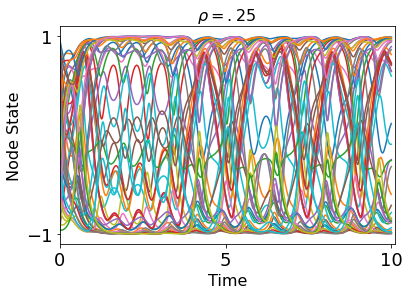

Error 0.8162015152883172 (Probably should do mean)


In [13]:
R = rcomp.internal_state_response(t, U, r0)
plt.plot(t - 40, R)

end=10
plt.title("$\\rho = .25$ ", fontsize=16)
plt.ylim([-1.1, 1.1])
plt.xlim([0, end + 0.1])
plt.xticks([0])
plt.yticks([-1, 1], fontsize=18)
plt.xticks([0, 5, 10], fontsize=18)
plt.xlabel("Time", fontsize=16)
plt.ylabel("Node State", fontsize=16)
plt.show()

Wout = U.T @ R @ np.linalg.inv(R.T @ R)
Uhat = (Wout@R.T).T
#plt.plot(Uhat)
err = np.max(np.abs(Uhat - U))
print(f"Error {err} (Probably should do mean)")

## Spectral Radius = 0.25 Mean Error

In [235]:
rho = 0.25
inferr = []
l2err = []
for i in range(25):
    inf, l2 = decoupled_err(rho)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

Error: 0.820988051780281 (Linf) 0.15996607970132362 (L2)


## Decoupled Reservoir Node States. Spectral Radius = 1.5

In [14]:
n = RES_PARAMS["res_sz"]
rho = 1.5
I = np.eye(n) * rho
rcomp = rc.ResComp(I, **RES_PARAMS)
t, U = rc.orbit("lorenz", trim=True)
r0 = np.random.rand(n)*2 - 1

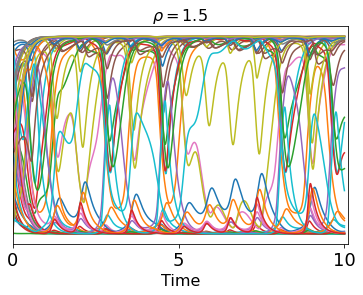

Error 1.7601167400701243


In [16]:
R = rcomp.internal_state_response(t, U, r0)
plt.plot(t - 40, R)

end=10
plt.title("$\\rho = 1.5$ ", fontsize=16)
plt.ylim([-1.1, 1.1])
plt.xlim([0, end + 0.1])
plt.xticks([0])
plt.yticks([], fontsize=18)
plt.xticks([0, 5, 10], fontsize=18)
plt.xlabel("Time", fontsize=16)
#plt.ylabel("Node State", fontsize=16)
plt.show()

Wout = U.T @ R @ np.linalg.inv(R.T @ R)
Uhat = (Wout@R.T).T
#plt.plot(Uhat)
err = np.max(np.abs(Uhat - U))
print(f"Error {err}")

## Spectral Radius = 1.5 Mean Error

In [236]:
rho = 1.5
inferr = []
l2err = []
for i in range(25):
    inf, l2 = decoupled_err(rho)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

Error: 1.270548721019554 (Linf) 0.3202557255316293 (L2)


## Decoupled Reservoir Node States. Spectral Radius = 3.0

In [17]:
n = RES_PARAMS["res_sz"]
rho = 3.0
I = np.eye(n) * rho
rcomp = rc.ResComp(I, **RES_PARAMS)
t, U = rc.orbit("lorenz", trim=True)
r0 = np.random.rand(n)*2 - 1

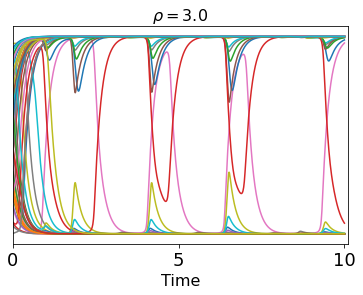

Error 0.7966464702511757


In [19]:
R = rcomp.internal_state_response(t, U, r0)
plt.plot(t - 40, R)
end=10
plt.title("$\\rho = 3.0$ ", fontsize=16)
plt.ylim([-1.1, 1.1])
plt.xlim([0, end + 0.1])
plt.xticks([0])
plt.yticks([], fontsize=18)
plt.xticks([0, 5, 10], fontsize=18)
plt.xlabel("Time", fontsize=16)
#plt.ylabel("Node State", fontsize=16)
plt.show()


Wout = U.T @ R @ np.linalg.inv(R.T @ R)
Uhat = (Wout@R.T).T
#plt.plot(Uhat)
err = np.max(np.abs(Uhat - U))
print(f"Error {err}")

## Spectral Radius = 3.0 Mean Error

In [237]:
rho = 3.0
inferr = []
l2err = []
for i in range(25):
    inf, l2 = decoupled_err(rho)
    inferr.append(inf)
    l2err.append(l2)
print(f"Error: {np.mean(inferr)} (Linf) {np.mean(l2err)} (L2)")
    

Error: 2.945861386283316 (Linf) 1.2365604893954925 (L2)
